# Fast Approach to Solve the Test

THIS IS A FAST APPROACH!

- I want to do a fast approach in order to establish a BASELINE
- From here, we can find out more about cleaning and analysing all the features

In [1]:
##################################################
###### Import Libraries
##################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 2000)

##################################################
###### Import Data
##################################################
path_train = '../data/train.csv'
path_test = '../data/test.csv'
path_dict = '../data/WiDS data dictionary v2.xlsx'
train = pd.read_csv(path_train,low_memory=False)
test = pd.read_csv(path_test,low_memory=False)
dic = pd.read_excel(path_dict) # install xlrd > 1.0.0

print('Train Shape: %s\nTest Shape: %s\nDictionary Shape: %s'%(train.shape,test.shape,dic.shape))

Train Shape: (18255, 1235)
Test Shape: (27285, 1234)
Dictionary Shape: (1105, 3)


In [2]:
train.head()

train_id  AA3  AA4  AA5  AA6     AA7  AA14  AA15   DG1  is_female  DG3  \
0         0    3   32  3.0  NaN  323011  3854   481  1975          1    3   
1         1    2   26  NaN  8.0  268131  2441   344  1981          1    8   
2         2    1   16  NaN  7.0  167581   754   143  1995          1    3   
3         3    4   44  5.0  NaN  445071  5705   604  1980          1    3   
4         4    4   43  NaN  6.0  436161  5645   592  1958          1    3   

   DG3A DG3A_OTHERS  DG4  DG4_OTHERS  DG5_1  DG5_2  DG5_3  DG5_4  DG5_5  \
0     4         NaN    5         NaN      1      2      2      2      2   
1     4         NaN    5         NaN      2      2      2      2      2   
2     2         NaN    2         NaN      1      2      2      2      2   
3     4         NaN    5         NaN      1      2      2      2      2   
4     4         NaN    6         NaN      1      2      2      2      1   

   DG5_6  DG5_7  DG5_8  DG5_9  DG5_10  DG5_11  DG5_96  DG6  DG8a  DG8b  DG8c  \
0      1      1      2      2       2       2       2    2     4     1     0   
1      1      1      2      2       1       2       2    2     4     1     0   
2      1      1      2      2       1       2       2    7     4     2     2   
3      1      1      2      2       2       2       2    2     2     2    99   
4      1      1      2      2       2       2       2    2    99     0     0   

   DG9a  DG9b  DG9c  DG10b  DG10c  DG11b  DG11c  DG12B_1  DG12B_2  DG12C_1  \
0   4.0   0.0   NaN    1.0    NaN    1.0    NaN      1.0      2.0      NaN   
1   2.0   0.0   NaN    1.0    NaN    1.0    NaN      1.0      2.0      NaN   
2   1.0   0.0   0.0    2.0    0.0    2.0    NaN      1.0      2.0      NaN   
3   2.0   2.0   NaN    2.0    NaN    2.0    NaN      1.0      2.0      NaN   
4   NaN   NaN   NaN    NaN    NaN    NaN    NaN      NaN      NaN      NaN   

   DG12C_2  DG13_1  DG13_2  DG13_3  DG13_4  DG13_5  DG13_96  DG13_7  \
0      NaN     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
1      NaN     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
2      NaN     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
3      NaN     NaN     NaN     NaN     NaN     NaN      NaN     NaN   
4      NaN     NaN     NaN     NaN     NaN     NaN      NaN     NaN   

  DG13_OTHERS  DG14 DG14_OTHERS  DL0  DL1 DL1_OTHERS   DL2 DL2_23_OTHERS  \
0         NaN   NaN         NaN    1    1        NaN  22.0           NaN   
1         NaN   NaN         NaN    2    7        NaN   NaN           NaN   
2         NaN   NaN         NaN    2    7        NaN   NaN           NaN   
3         NaN   NaN         NaN    2    7        NaN   NaN           NaN   
4         NaN   NaN         NaN    2    7        NaN   NaN           NaN   

  DL2_96_OTHERS  DL3  DL4_1  DL4_2  DL4_3  DL4_4  DL4_5  DL4_6  DL4_7  DL4_8  \
0           NaN  1.0      2      2      2      2      2      2      2      2   
1           NaN  NaN      2      2      2      2      2      2      2      2   
2           NaN  NaN      2      2      1      2      1      2      2      2   
3           NaN  NaN      2      2      2      2      2      2      2      2   
4           NaN  NaN      2      2      2      2      2      2      2      2   

   DL4_9  DL4_10  DL4_11  DL4_12  DL4_13  DL4_14  DL4_15  DL4_16  DL4_17  \
0      2       2       2       2       2       2       2       2       2   
1      2       2       2       2       2       2       2       2       2   
2      2       2       2       2       2       2       2       2       2   
3      2       2       2       2       2       2       2       2       2   
4      2       2       2       2       2       2       2       2       2   

   DL4_18  DL4_19  DL4_20  DL4_21  DL4_22  DL4_23  DL4_96  DL4_99 DL4_OTHERS  \
0       2       2       2       2       2       2       2       1        NaN   
1       2       2       2       2       2       2       2       1        NaN   
2       2       2       2       2       2       2       2       2        NaN 

In [3]:
# Drop all the columns with Missing Values
train.dropna(axis=1,how='any', inplace=True)
print(train.shape)

(18255, 239)


In [4]:
# Features and Target
features = [x for x in train.columns.values.tolist() if x not in ['train_id','is_female']]
X = train[features]
y = train['is_female']
print('X Shape: %s\ny Shape: %s'%(X.shape,y.shape))

X Shape: (18255, 237)
y Shape: (18255,)


In [5]:
# Splitting between train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state = 4) 

### Estimators

/home/eduardo/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


********************************
Model:  Logistic Regression
Null Accuracy: 0.5324568611339359
Accuracy: 0.7196658449739798
AUC Score: 0.7933457097499764


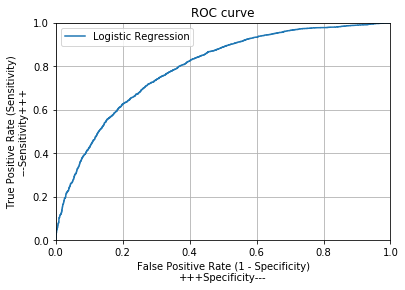

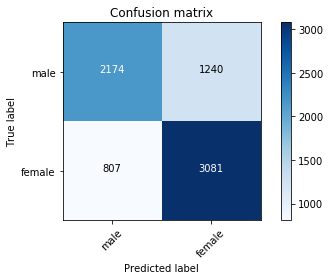

********************************
Model:  Decision Tree
Null Accuracy: 0.5324568611339359
Accuracy: 0.8915365653245686
AUC Score: 0.9502874947866569


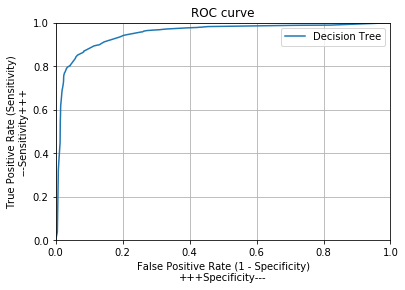

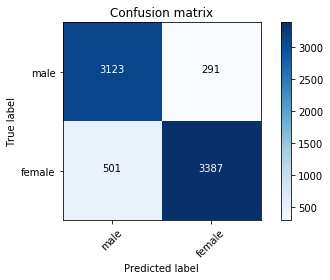

********************************
Model:  Random Forest
Null Accuracy: 0.5324568611339359
Accuracy: 0.8900301287318543
AUC Score: 0.9579684369733921


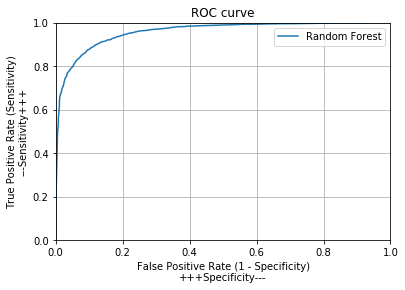

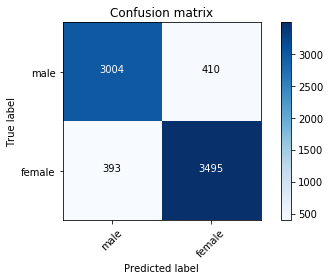

********************************
Model:  XGBClassifier
Null Accuracy: 0.5324568611339359
Accuracy: 0.9012599287866337
AUC Score: 0.9648254524458717


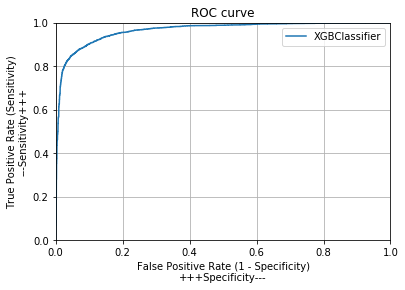

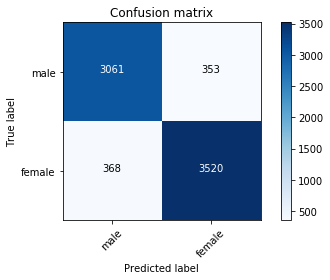

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(seed = 45)
tree=DecisionTreeClassifier(criterion='entropy',min_samples_split=20,max_depth=7, random_state=99)
logreg = LogisticRegression(solver='warn')
trees = 321
rf = RandomForestClassifier(n_estimators=trees,random_state=1234)
models = {logreg:'Logistic Regression',tree:'Decision Tree',rf:'Random Forest',xgb:'XGBClassifier'}
for i in models.keys():
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    y_pred_prob = i.predict_proba(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred_prob[:,1])
    print('********************************')
    print('Model: ',models[i])
    print('Null Accuracy:',max(y_test.mean(), 1 - y_test.mean()))
    print('Accuracy:',score)
    print('AUC Score:',auc)

    # ROC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
    plt.plot(fpr, tpr,label=models[i])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)\n+++Specificity---')
    plt.ylabel('True Positive Rate (Sensitivity)\n---Sensitivity+++')
    plt.legend()
    plt.grid(True)
    # From Scikit-Learn Documentation
    cm = metrics.confusion_matrix(y_test, y_pred)
    import itertools
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()


    # Compute confusion matrix

    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=['male','female'],
                          title='Confusion matrix')

    plt.show()    

####### Optimise max_depth

for i in range(1,11):
    tree=DecisionTreeClassifier(criterion='entropy',max_depth=i,min_samples_split=20 , random_state=99)
    tree.fit(X,y)
    from sklearn.model_selection import KFold
    cv=KFold(n_splits=10,shuffle=True,random_state=1)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(tree, X, y,   cv=cv,scoring='accuracy')
    print('*************************************')
    print('MaxDepth = %s \nScore: %s'%(i,scores.mean()))
    #print('FEATURE IMPORTANCE:')
    #for j in range(len(tree.feature_importances_)):
        #print('Feature_%s:%s'%(j,tree.feature_importances_[j]))

####### Optimise n_estimators

for i in range(1,600,20):
    rf = RandomForestClassifier(n_estimators=i,random_state=1234)
    rf.fit(X,y)
    from sklearn.model_selection import KFold
    cv=KFold(n_splits=10,shuffle=True,random_state=1)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(rf, X, y, cv=cv,scoring='accuracy')
    print('*************************************')
    print('MaxDepth = %s \nScore: %s'%(i,scores.mean()))
    #print('FEATURE IMPORTANCE:')
    #for j in range(len(tree.feature_importances_)):
        #print('Feature_%s:%s'%(j,tree.feature_importances_[j]))

The best model in this fast approach is XGBoostClassifier. This is our FIRST BASELINE. From here, we have to work on cleaning and feature engineering to improve this result.

The most important thing is that we did a simple model in a fast way to find out more about the problem.